In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import time

import sys, os, glob
sys.path.insert(0, "../../")
import setigen as stg

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/h5py/__init__.py:40: UserWarning: h5py is running against HDF5 1.10.4 when it was built against 1.10.5, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s)

In [2]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s)

In [4]:
p = 2
tscint = 60
rho = stg.get_rho(frame.ts, tscint, p)
print(rho)

r = [0.74, 0.24]
r=rho

Z = stg.build_Z(r, frame.tchans)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

[0.85671153 0.51926775]
[0.85487894 0.5220041 ]


In [9]:
r = [ 0.73 , 0.22]
Z = stg.build_Z(r, 10000)
Y = stg.get_Y(Z)
result = stg.autocorrelation(Y, p+1)[1:]
print(result)

residuals = np.array(rho) - np.array(result)
print(residuals)
print('Error:', np.sqrt(sum(residuals**2)))

[0.69261487 0.18711903]
[0.00726921 0.01138375]
Error: 0.013506712560040579


In [5]:
results = np.array([ 0.73 , 0.22])

start = time.time()
for step in range(100):
    Z = stg.build_Z(results, 10000)
    Y = stg.get_Y(Z)
    result = stg.autocorrelation(Y, p+1)[1:]

    residuals = np.array(rho) - np.array(result)
    results += residuals
print(result)
print('Error:', np.sqrt(sum(residuals**2)))
print('Runtime: {} seconds'.format(time.time() - start))

[0.70580485 0.20718374]
Error: 0.010507834592171214
Runtime: 4.565370082855225 seconds


In [66]:
p = 2
tscint = 5
rho = stg.get_rho(frame.ts, tscint, p)
print('Rho:', rho)


r_next = rho.copy()

start = time.time()
for step in range(10):
    Z = stg.build_Z(r_next, 100)
    Y = stg.get_Y(Z)
    r = stg.autocorrelation(Y, p+1)[1:]

    residuals = np.array(rho) - np.array(r)
    r_next += residuals
print(r)
print('Error:', np.sqrt(sum(residuals**2)))
print('Runtime: {} seconds'.format(time.time() - start))

Rho: [0.87062299 0.55706152]


AssertionError: 

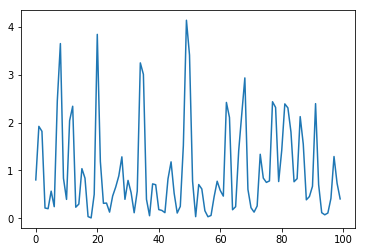

In [194]:
plt.plot(Y)

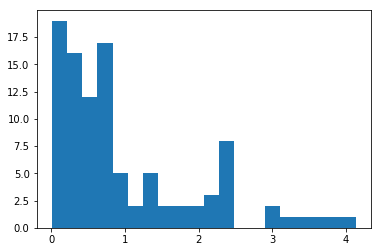

In [195]:
plt.hist(Y, bins=20)
plt.show()

In [68]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s)

# frame = stg.Frame(fchans=1024,
#                   tchans=16,
#                   df=2.7939677238464355*u.Hz,
#                   dt=18.253611008*u.s)

num_signals = 4

Z = stg.build_Z(r, frame.tchans * num_signals)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

[0.94348497 0.78515101]


In [30]:
noise = frame.add_noise_from_obs()
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], drift_rate=2*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[400], drift_rate=2*u.Hz/u.s),
                          Y[frame.tchans:2*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[600], drift_rate=2*u.Hz/u.s),
                          Y[2*frame.tchans:3*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[800], drift_rate=2*u.Hz/u.s),
                          Y[3*frame.tchans:] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

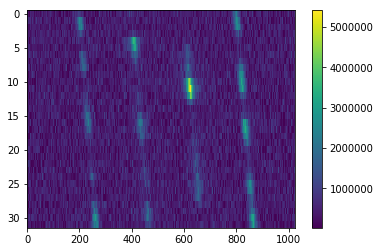

In [31]:
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

[0.94946397 0.80627428]


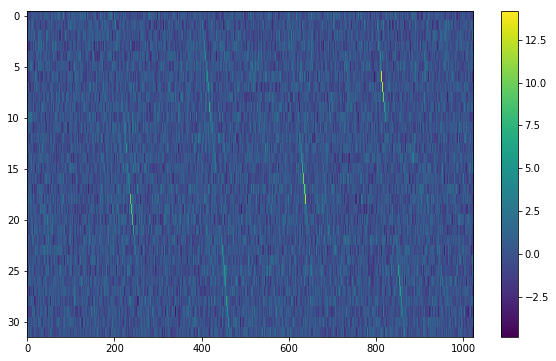

In [69]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s)

num_signals = 4

Z = stg.build_Z(r, frame.tchans * num_signals)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

noise = frame.add_noise(0, 1)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], drift_rate=2*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=2*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[400], drift_rate=2*u.Hz/u.s),
                          Y[frame.tchans:2*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=2*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[600], drift_rate=2*u.Hz/u.s),
                          Y[2*frame.tchans:3*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=2*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[800], drift_rate=2*u.Hz/u.s),
                          Y[3*frame.tchans:] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=2*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

[0.66267248 0.17848489]


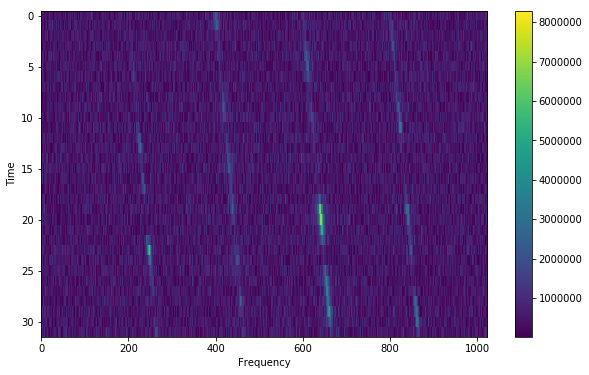

In [72]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s)

num_signals = 4

p = 2
tscint = 3
rho = stg.get_rho(frame.ts, tscint, p)

Z = stg.build_Z(rho, frame.tchans * num_signals)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

noise = frame.add_noise_from_obs()
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], drift_rate=2*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[400], drift_rate=2*u.Hz/u.s),
                          Y[frame.tchans:2*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[600], drift_rate=2*u.Hz/u.s),
                          Y[2*frame.tchans:3*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[800], drift_rate=2*u.Hz/u.s),
                          Y[3*frame.tchans:] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')

plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar()

plt.savefig('rf_scint_10Hz_3td.png', bbox_inches='tight')
plt.show()

[0.95774251 0.83242893]


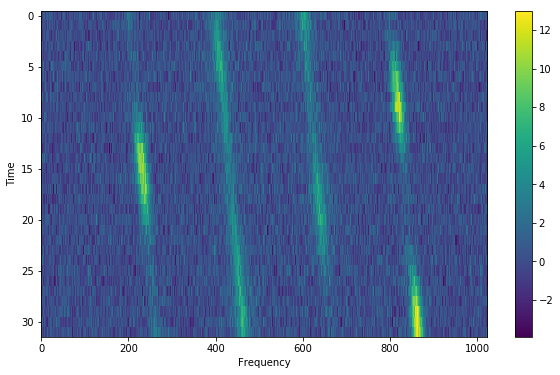

In [74]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s)

num_signals = 4

p = 2
tscint = 10
rho = stg.get_rho(frame.ts, tscint, p)

Z = stg.build_Z(rho, frame.tchans * num_signals)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

noise = frame.add_noise(0, 1)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], drift_rate=2*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[400], drift_rate=2*u.Hz/u.s),
                          Y[frame.tchans:2*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[600], drift_rate=2*u.Hz/u.s),
                          Y[2*frame.tchans:3*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[800], drift_rate=2*u.Hz/u.s),
                          Y[3*frame.tchans:] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar()

plt.savefig('rf_scint_30Hz_10td.png', bbox_inches='tight')
plt.show()

[0.9581574  0.84234817]


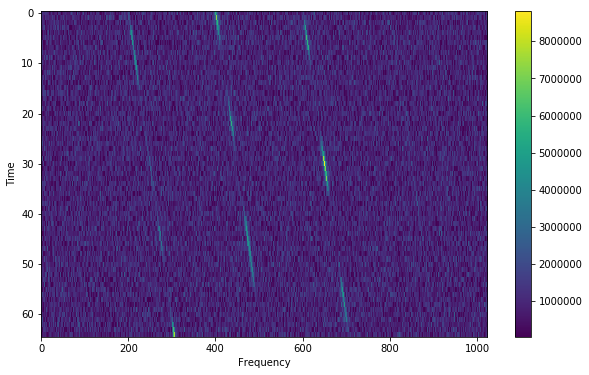

In [23]:
obs_length = 300

dt = 18.253611008/4
frame = stg.Frame(fchans=1024,
                  tchans=int(obs_length / dt),
                  df=2.7939677238464355*u.Hz,
                  dt=dt*u.s)

num_signals = 4

p = 2
tscint = 30

rho = stg.get_rho(frame.ts, tscint, p)

Z = stg.build_Z(rho, frame.tchans * num_signals)
Y = stg.get_Y(Z)
print(stg.autocorrelation(Y, p+1)[1:])

noise = frame.add_noise_from_obs()
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], drift_rate=1*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[400], drift_rate=1*u.Hz/u.s),
                          Y[frame.tchans:2*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[600], drift_rate=1*u.Hz/u.s),
                          Y[2*frame.tchans:3*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[800], drift_rate=1*u.Hz/u.s),
                          Y[3*frame.tchans:] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')

plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar()

plt.savefig('rf_scint_10Hz_60td.png', bbox_inches='tight')
plt.show()